### 任务：
1. 采用 MeanShift 算法实现2D数据自动聚类，预测 V1=80, V2=60 数据类别；
2. 计算预测准确率，完成结果矫正

In [1]:
# 控制以允许JupyterNotebook多个输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_path = './datasets/08/data.csv'

In [4]:
data = pd.read_csv(data_path)
data.head()

,V1,V2,labels
0,2.072345,-3.241693,0
1,17.936710,15.784810,0
2,1.083576,7.319176,0
3,11.120670,14.406780,0
4,23.711550,2.557729,0


In [5]:
pd.value_counts(data.loc[:, 'labels'])

2    1156
1     954
0     890
Name: labels, dtype: int64

In [6]:
data = np.array(data)

In [7]:
X, y = data[:, :2], data[:, 2]
X.shape
y.shape

(3000, 2)

(3000,)

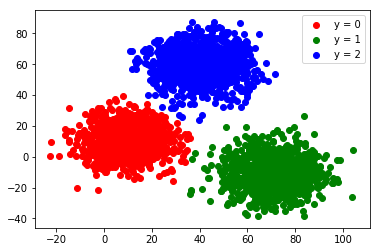

In [8]:
y_0 = plt.scatter(X[y==0, 0], X[y==0, 1], color='r')
y_1 = plt.scatter(X[y==1, 0], X[y==1, 1], color='g')
y_2 = plt.scatter(X[y==2, 0], X[y==2, 1], color='b')
plt.legend((y_0, y_1, y_2), ('y = 0', 'y = 1', 'y = 2'))
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import accuracy_score

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021)
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(2250, 2)

(2250,)

(750, 2)

(750,)

In [11]:
bandwidth = estimate_bandwidth(X_train, n_samples=500)
bandwidth

29.373360234294307

In [12]:
ms_cluster = MeanShift(bandwidth=bandwidth)
ms_cluster

MeanShift(bandwidth=29.373360234294307, bin_seeding=False, cluster_all=True,
     min_bin_freq=1, n_jobs=1, seeds=None)

In [13]:
ms_cluster.fit(X_train)

MeanShift(bandwidth=29.373360234294307, bin_seeding=False, cluster_all=True,
     min_bin_freq=1, n_jobs=1, seeds=None)

In [14]:
y_train_predict = ms_cluster.predict(X_train)

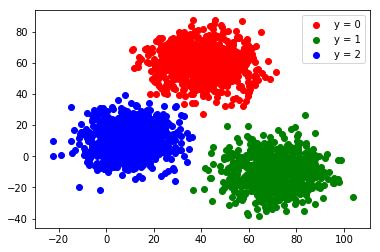

In [15]:
y_0 = plt.scatter(X_train[y_train_predict==0, 0], X_train[y_train_predict==0, 1], color='r')
y_1 = plt.scatter(X_train[y_train_predict==1, 0], X_train[y_train_predict==1, 1], color='g')
y_2 = plt.scatter(X_train[y_train_predict==2, 0], X_train[y_train_predict==2, 1], color='b')
plt.legend((y_0, y_1, y_2), ('y = 0', 'y = 1', 'y = 2'))
plt.show()

In [16]:
exchange_dict = {
    0: 2,
    1: 1,
    2: 0
}

In [17]:
y_test_predict = ms_cluster.predict(X_test)

In [18]:
y_test_predict_correct = [exchange_dict[e] for e in y_test_predict]

In [19]:
accuracy_score(y_true=y_test, y_pred=y_test_predict_correct)

0.9946666666666667

In [20]:
# 绘制决策边界
def plot_decision_boundary(model, axis, epsilon=500):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], epsilon).reshape(-1, 1),
        np.linspace(axis[2], axis[3], epsilon).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

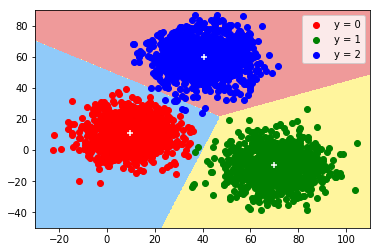

In [21]:
plot_decision_boundary(model=ms_cluster, axis=[-30, 110, -50, 90], epsilon=500)
y_0 = plt.scatter(X[y==0, 0], X[y==0, 1], color='r')
y_1 = plt.scatter(X[y==1, 0], X[y==1, 1], color='g')
y_2 = plt.scatter(X[y==2, 0], X[y==2, 1], color='b')
plt.scatter(ms_cluster.cluster_centers_[:, 0], ms_cluster.cluster_centers_[:, 1], color='#FFFFFF', marker='+')
plt.legend((y_0, y_1, y_2), ('y = 0', 'y = 1', 'y = 2'))
plt.show()

In [22]:
X_target = np.array([80, 60]).reshape(1, -1)

In [25]:
y_target = exchange_dict[ms_cluster.predict(X_target)[0]]
y_target

2